# Austin Area Property Values and Racial Diversity Analysis

#### Importing Libraries and Modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

#### Merging Data (see Census-Data-ETL, US-Census-Data-ETL2 and Zillow-Data-ETL notebooks for data gathering)

In [2]:
zillow_data1= "data_sources/zillow_data/zillow_medianhome_matched.csv"
zillow_pd= pd.read_csv(zillow_data1)
census_data1= "data_sources/census_data/combined_census_cleaned.csv"
census_pd= pd.read_csv(census_data1)

In [3]:
merge_data= pd.merge(zillow_pd,census_pd, on=["Zip","Year"])
merge_data = merge_data.drop(["City_y"], axis=1)
merge_data= merge_data.rename(columns={"City_x":"City", "Year_x":"Zillow Years", "Year_y":"Census Years"})
merge_data.head()

,Zip,City,County,Type,Area,Value,Year,Total-Population,Hispanic,White,Black,Native,Asian,Other,Total,Diversity Index
0,76574,Taylor,Williamson County,Rural,North,106847.78,2011,17213,35.3,54.0,8.6,0.0,1.8,0.3,100.0,0.576062
1,76574,Taylor,Williamson County,Rural,North,106776.56,2012,17775,34.5,53.6,8.9,0.0,2.0,1.0,100.0,0.585258
2,76574,Taylor,Williamson County,Rural,North,107119.61,2013,18037,36.8,51.1,9.8,0.0,0.2,2.2,100.1,0.593363
3,76574,Taylor,Williamson County,Rural,North,107849.07,2014,18135,35.3,51.9,9.9,0.0,0.4,2.5,100.0,0.595588
4,76574,Taylor,Williamson County,Rural,North,109096.49,2015,18281,41.4,46.0,9.6,0.1,0.7,2.1,99.9,0.607297


#### Creating sorted data for each area type

In [4]:
# Gathering data for Urban plot
urban_df = merge_data[merge_data['Type'] == "Urban"]
urban_year = urban_df['Year']
urban_di = urban_df['Diversity Index']
urban_value = urban_df['Value']

# Gathering data for Suburban plot
suburban_df = merge_data[merge_data['Type'] == "Suburban"]
suburban_year = suburban_df['Year']
suburban_di = suburban_df['Diversity Index']
suburban_value = suburban_df['Value']

# Gathering data for Rural plot
rural_df = merge_data[merge_data['Type'] == "Rural"]
rural_year = rural_df['Year']
rural_di = rural_df['Diversity Index']
rural_value = rural_df['Value']

### Scatter and Line Plots of Area Types

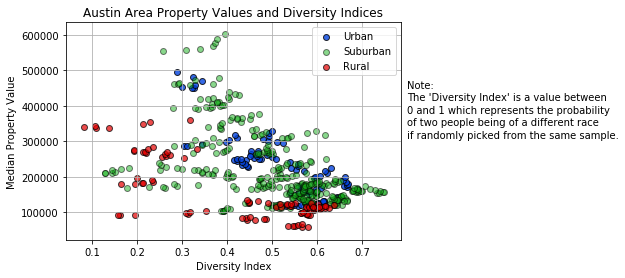

In [5]:
urban_bplot = plt.scatter(urban_di, urban_value, facecolors='xkcd:blue', edgecolors='black', 
                    alpha=.8, label="Urban")
suburban_bplot = plt.scatter(suburban_di, suburban_value, facecolors='xkcd:green', edgecolors='black',
                    alpha=.5, label="Suburban")
rural_bplot = plt.scatter(rural_di, rural_value, facecolors='xkcd:red', edgecolors='black', 
                    alpha=.7, label="Rural")
plt.title('Austin Area Property Values and Diversity Indices')
plt.ylabel('Median Property Value')
plt.xlabel('Diversity Index')
plt.text(.8, 450000, "Note:")
plt.text(.8, 415000, "The 'Diversity Index' is a value between")
plt.text(.8, 380000, "0 and 1 which represents the probability")
plt.text(.8, 345000, "of two people being of a different race")
plt.text(.8, 310000, "if randomly picked from the same sample.")
plt.legend()
plt.grid()
plt.savefig("output_images/scatter_eric.png")
plt.show()

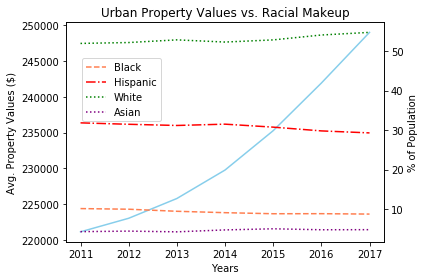

In [6]:
urban_sort = urban_df.groupby('Year')
urban_avg_values = urban_sort['Value'].mean()
urban_years = urban_sort['Year'].mean()
urban_avg_di = urban_sort['Diversity Index'].mean()
urban_avg_black = urban_sort['Black'].mean()
urban_avg_hisp = urban_sort['Hispanic'].mean()
urban_avg_white = urban_sort['White'].mean()
urban_avg_asian = urban_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(urban_years, urban_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values ($)')


ax2 = ax1.twinx()
ax2.plot(urban_years, urban_avg_black, color='coral', linestyle='--')
ax2.plot(urban_years, urban_avg_hisp, color='red', linestyle ='-.')
ax2.plot(urban_years, urban_avg_white, color='green', linestyle=':')
ax2.plot(urban_years, urban_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')

plt.title('Urban Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.55))
fig.tight_layout()
plt.savefig("output_images/urbanline_eric.png")
plt.show()

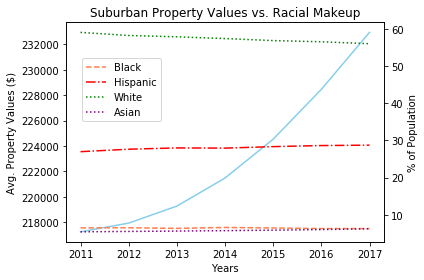

In [7]:
suburban_sort = suburban_df.groupby('Year')
suburban_avg_values = suburban_sort['Value'].mean()
suburban_years = suburban_sort['Year'].mean()
suburban_avg_di = suburban_sort['Diversity Index'].mean()
suburban_avg_black = suburban_sort['Black'].mean()
suburban_avg_hisp = suburban_sort['Hispanic'].mean()
suburban_avg_white = suburban_sort['White'].mean()
suburban_avg_asian = suburban_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(suburban_years, suburban_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values ($)')


ax2 = ax1.twinx()
ax2.plot(suburban_years, suburban_avg_black, color='coral', linestyle='--')
ax2.plot(suburban_years, suburban_avg_hisp, color='red', linestyle ='-.')
ax2.plot(suburban_years, suburban_avg_white, color='green', linestyle=':')
ax2.plot(suburban_years, suburban_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')

plt.title('Suburban Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.55))
fig.tight_layout()
plt.savefig("output_images/suburbanline_eric.png")
plt.show()

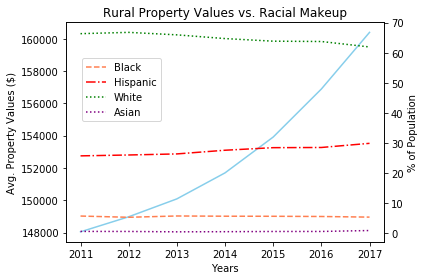

In [8]:
rural_sort = rural_df.groupby('Year')
rural_avg_values = rural_sort['Value'].mean()
rural_years = rural_sort['Year'].mean()
rural_avg_di = rural_sort['Diversity Index'].mean()
rural_avg_black = rural_sort['Black'].mean()
rural_avg_hisp = rural_sort['Hispanic'].mean()
rural_avg_white = rural_sort['White'].mean()
rural_avg_asian = rural_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(rural_years, rural_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values ($)')


ax2 = ax1.twinx()
ax2.plot(rural_years, rural_avg_black, color='coral', linestyle='--')
ax2.plot(rural_years, rural_avg_hisp, color='red', linestyle ='-.')
ax2.plot(rural_years, rural_avg_white, color='green', linestyle=':')
ax2.plot(rural_years, rural_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')

plt.title('Rural Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.55))
fig.tight_layout()
plt.savefig("output_images/ruralline_eric.png")
plt.show()

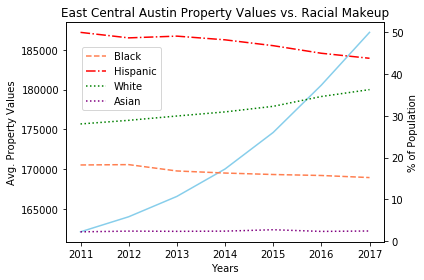

In [9]:
east_cen_zips = [78702, 78721, 78722, 78723, 78741, 78752]
east_central_df = merge_data[merge_data['Zip'].isin(east_cen_zips)]
east_central_df

east_central_sort = east_central_df.groupby('Year')
east_central_avg_values = east_central_sort['Value'].mean()
east_central_years = east_central_sort['Year'].mean()
east_central_avg_di = east_central_sort['Diversity Index'].mean()
east_central_avg_black = east_central_sort['Black'].mean()
east_central_avg_hisp = east_central_sort['Hispanic'].mean()
east_central_avg_white = east_central_sort['White'].mean()
east_central_avg_asian = east_central_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(east_central_years, east_central_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values')


ax2 = ax1.twinx()
ax2.plot(east_central_years, east_central_avg_black, color='coral', linestyle='--')
ax2.plot(east_central_years, east_central_avg_hisp, color='red', linestyle ='-.')
ax2.plot(east_central_years, east_central_avg_white, color='green', linestyle=':')
ax2.plot(east_central_years, east_central_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')

plt.title('East Central Austin Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.6))
fig.tight_layout()
plt.savefig("output_images/eastcentralline_eric.png")
plt.show()

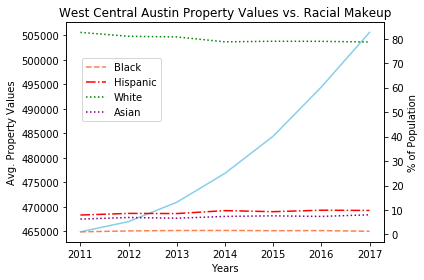

In [10]:
west_cen_zips = [78703, 78731, 78746]
west_central_df = merge_data[merge_data['Zip'].isin(west_cen_zips)]
west_central_df

west_central_sort = west_central_df.groupby('Year')
west_central_avg_values = west_central_sort['Value'].mean()
west_central_years = west_central_sort['Year'].mean()
west_central_avg_di = west_central_sort['Diversity Index'].mean()
west_central_avg_black = west_central_sort['Black'].mean()
west_central_avg_hisp = west_central_sort['Hispanic'].mean()
west_central_avg_white = west_central_sort['White'].mean()
west_central_avg_asian = west_central_sort['Asian'].mean()

fig, ax1 = plt.subplots()
ax1.plot(west_central_years, west_central_avg_values, color='skyblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Property Values')


ax2 = ax1.twinx()
ax2.plot(west_central_years, west_central_avg_black, color='coral', linestyle='--')
ax2.plot(west_central_years, west_central_avg_hisp, color='red', linestyle ='-.')
ax2.plot(west_central_years, west_central_avg_white, color='green', linestyle=':')
ax2.plot(west_central_years, west_central_avg_asian, color='purple', linestyle=':')
ax2.set_ylabel('% of Population')

plt.title('West Central Austin Property Values vs. Racial Makeup')
plt.legend(loc=(.05,.55))
fig.tight_layout()
plt.savefig("output_images/westcentralline_eric.png")
plt.show()

### Regression Analysis on Overall Data and Urban Data

Linear Regression Analysis (All Zips and Years)
--------------------------
slope: -366763.29582571954    intercept: 391067.6471445414    stderr: 29170.424325240187
r-value: -0.48937718437748057    p-value: 1.0384045132848702e-31


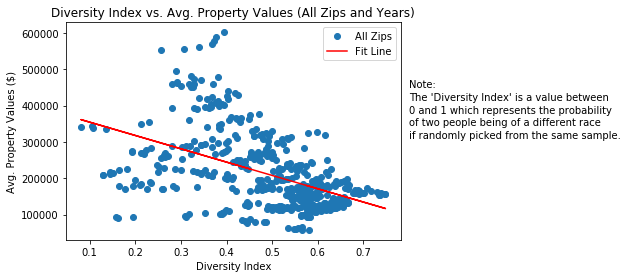

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merge_data['Diversity Index'], merge_data['Value'])
all_fit = slope * merge_data['Diversity Index'] + intercept
print("Linear Regression Analysis (All Zips and Years)")
print("--------------------------")
print(f"slope: {slope}    intercept: {intercept}    stderr: {std_err}")
print(f"r-value: {r_value}    p-value: {p_value}")

plt.plot(merge_data['Diversity Index'], merge_data['Value'], 'o', label="All Zips")
plt.plot(merge_data['Diversity Index'], all_fit, 'r', label='Fit Line')
plt.xlabel("Diversity Index")
plt.ylabel("Avg. Property Values ($)")
plt.title("Diversity Index vs. Avg. Property Values (All Zips and Years)")
plt.text(.8, 450000, "Note:")
plt.text(.8, 415000, "The 'Diversity Index' is a value between")
plt.text(.8, 380000, "0 and 1 which represents the probability")
plt.text(.8, 345000, "of two people being of a different race")
plt.text(.8, 310000, "if randomly picked from the same sample.")
plt.legend()
plt.savefig("output_images/regressionall_eric.png")
plt.show()

Linear Regression Analysis (Urban Zips, All Years)
--------------------------
slope: -721519.9070789742    intercept: 604243.1975286675    stderr: 55372.52180057822
r-value: -0.8099936377599408    p-value: 2.437177227105379e-22


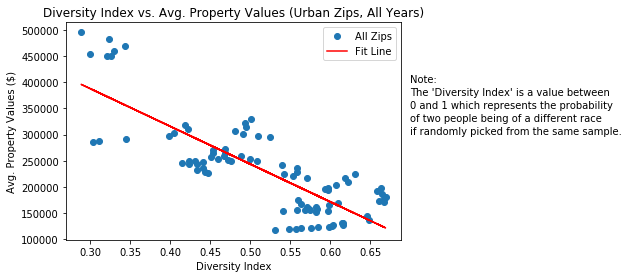

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(urban_di, urban_value)
urban_fit = slope * urban_di + intercept
print("Linear Regression Analysis (Urban Zips, All Years)")
print("--------------------------")
print(f"slope: {slope}    intercept: {intercept}    stderr: {std_err}")
print(f"r-value: {r_value}    p-value: {p_value}")

plt.plot(urban_di, urban_value, 'o', label="All Zips")
plt.plot(urban_di, urban_fit, 'r', label='Fit Line')
plt.xlabel("Diversity Index")
plt.ylabel("Avg. Property Values ($)")
plt.title("Diversity Index vs. Avg. Property Values (Urban Zips, All Years)")
plt.text(.7, 400000, "Note:")
plt.text(.7, 375000, "The 'Diversity Index' is a value between")
plt.text(.7, 350000, "0 and 1 which represents the probability")
plt.text(.7, 325000, "of two people being of a different race")
plt.text(.7, 300000, "if randomly picked from the same sample.")
plt.legend()
plt.savefig("output_images/regressionurban_eric.png")
plt.show()